<a href="https://colab.research.google.com/github/sosnes/dsc-importing-data-using-pandas-lab/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization - Lab

## Introduction
This lab will give you some structured practice performing data visualization!

## Objectives

You will be able to:

* Use Matplotlib to create a bar graph
* Use Matplotlib to create a scatter plot
* Use Matplotlib to create a histogram


In [1]:
# Run this cell without changes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

Make a vertical bar graph using `ax.bar()` for the following set of data:

> Jim's Video Library contains 40 crime, 30 science fiction, 10 drama, 50 comedy, 25 action and 5 documentary movies.

* Set x-axis (genres) and y-axis (number of movies)
* Plot and label the bar graph
* Provide a suitable title
* Label x and y-axis

Notes:

1. We are asking you to "hard-code" the numbers listed above into Python. There is no file or other data source to open.
2. `x` and `height` must be iterables of numbers, so `x` should just be 6 evenly-spaced numbers. To set the labels of "crime" etc. pass the `labels` into the `.bar()` function using the `tick_label` argument.

The graph you create should look like this:

![bar graph](https://curriculum-content.s3.amazonaws.com/data-science/images/bar_chart.png)

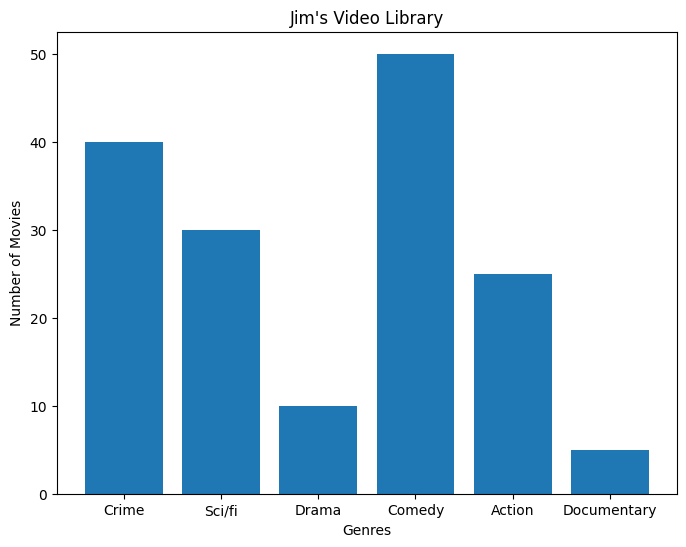

In [2]:
# Replace None with appropriate code
height = [40, 30, 10, 50, 25, 5]
x = range(6)
labels = ['Crime', 'Sci/fi', 'Drama', 'Comedy', 'Action', 'Documentary' ]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vertical bars of fixed width by passing x and height values to .bar() function
ax.bar(x, height, tick_label=labels)


# Give a title to the bar graph and label the axes
ax.set_title("Jim's Video Library")
ax.set_ylabel("Number of Movies")
ax.set_xlabel("Genres");



## Exercise 2

The table shows the data collected by a Consumer Products Group on the relationship between the weight of a car and its average gas mileage.

      Car Type  Weight	miles per gallon
        A	    2750	   29
        B	    3125	   23
        C	    2100	   33
        D	    4082	   18
        E	    2690	   20
        F	    3640	   21
        G	    4380	   14
        H	    2241	   25
        I	    2895	   31
        J	    3659	   17
        
* Use a scatter plot to show the relationship between mpg and weight of a car using `.scatter()`
* Set appropriate labels for axes
* Give a title to the plot
* Create a legend

Looking the scatter plot, think about: how would you describe the relationship between these two attributes?

The graph you create should look like this:

![scatter plot](https://curriculum-content.s3.amazonaws.com/data-science/images/scatter_plot.png)

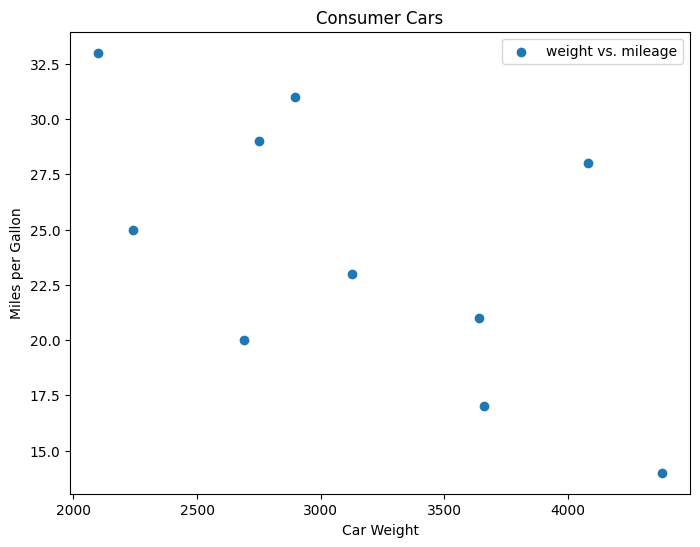

In [3]:
# Replace None with appropriate code

weight = [2750, 3125, 2100, 4082, 2690, 3640, 4380, 2241, 2895, 3659]
mpg = [29, 23, 33, 28, 20, 21, 14, 25, 31, 17]

# Create the plot
fig, ax = plt.subplots(figsize=(8,6))


# Plot with scatter()
ax.scatter(weight, mpg)


# Set x and y axes labels, legend, and title
ax.set_xlabel("Car Weight")
ax.set_ylabel("Miles per Gallon")
ax.legend(["weight vs. mileage"])
ax.set_title("Consumer Cars");




## Exercise 3

Joe is the branch manager at a bank. Recently, Joe has been receiving customer feedback saying that the waiting times for clients to be served by customer service representatives are too long. Joe decides to observe and write down the time spent waiting by each customer. Here are his findings from observing and writing down the wait times (in seconds), spent by 20 customers:

43.1, 35.6, 37.5, 36.5, 45.3, 43.4, 40.3, 50.2, 47.3, 31.2, 42.2, 45.5, 30.3, 31.4, 35.6, 45.2, 54.1, 45.6, 36.5, 43.1

* Build a histogram of these values using the `hist()` function. Use `bins=5` to represent the 20 data points
* Plot, label and give a title as above.

The graph you create should look like this:

![histogram](https://curriculum-content.s3.amazonaws.com/data-science/images/histogram.png)

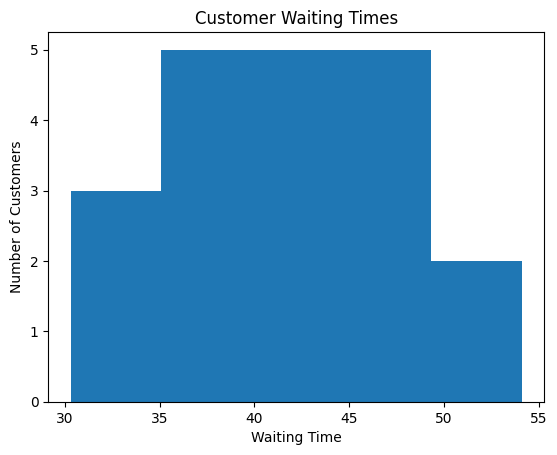

In [4]:
# Replace None with appropriate code

x = [43.1, 35.6, 37.5, 36.5, 45.3, 43.4,
     40.3, 50.2, 47.3, 31.2, 42.2, 45.5,
     30.3, 31.4, 35.6, 45.2, 54.1, 45.6,
     36.5, 43.1]

# Create the plot
fig, ax = plt.subplots()

# Plot the histogram with hist() function
ax.hist(x, bins=5)


# Label axes and set title
ax.set_xlabel("Waiting Time")
ax.set_ylabel("Number of Customers")
ax.set_title("Customer Waiting Times");



## Summary

In this lab, you got some good practice working with creating plots in Python using Matplotlib.